In [129]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import variation
from pandas.plotting import scatter_matrix

In [3]:
df = pd.read_csv(r'E:\Rustin Project\Final_Bikes.csv')
df.head()

,Unnamed: 0,Date_Time,Gender,Had_Helmet,Had_Passenger,On_Sidewalk
0,0,2010-09-24 7:00,Male,No,No,No
1,1,2010-09-24 7:00,Male,No,No,No
2,2,2010-09-24 7:00,Male,No,No,No
3,3,2010-09-24 7:00,Male,No,No,No
4,4,2010-09-24 7:00,Male,No,No,No


In [4]:
del df['Unnamed: 0']

In [5]:
df.head()

,Date_Time,Gender,Had_Helmet,Had_Passenger,On_Sidewalk
0,2010-09-24 7:00,Male,No,No,No
1,2010-09-24 7:00,Male,No,No,No
2,2010-09-24 7:00,Male,No,No,No
3,2010-09-24 7:00,Male,No,No,No
4,2010-09-24 7:00,Male,No,No,No


In [63]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

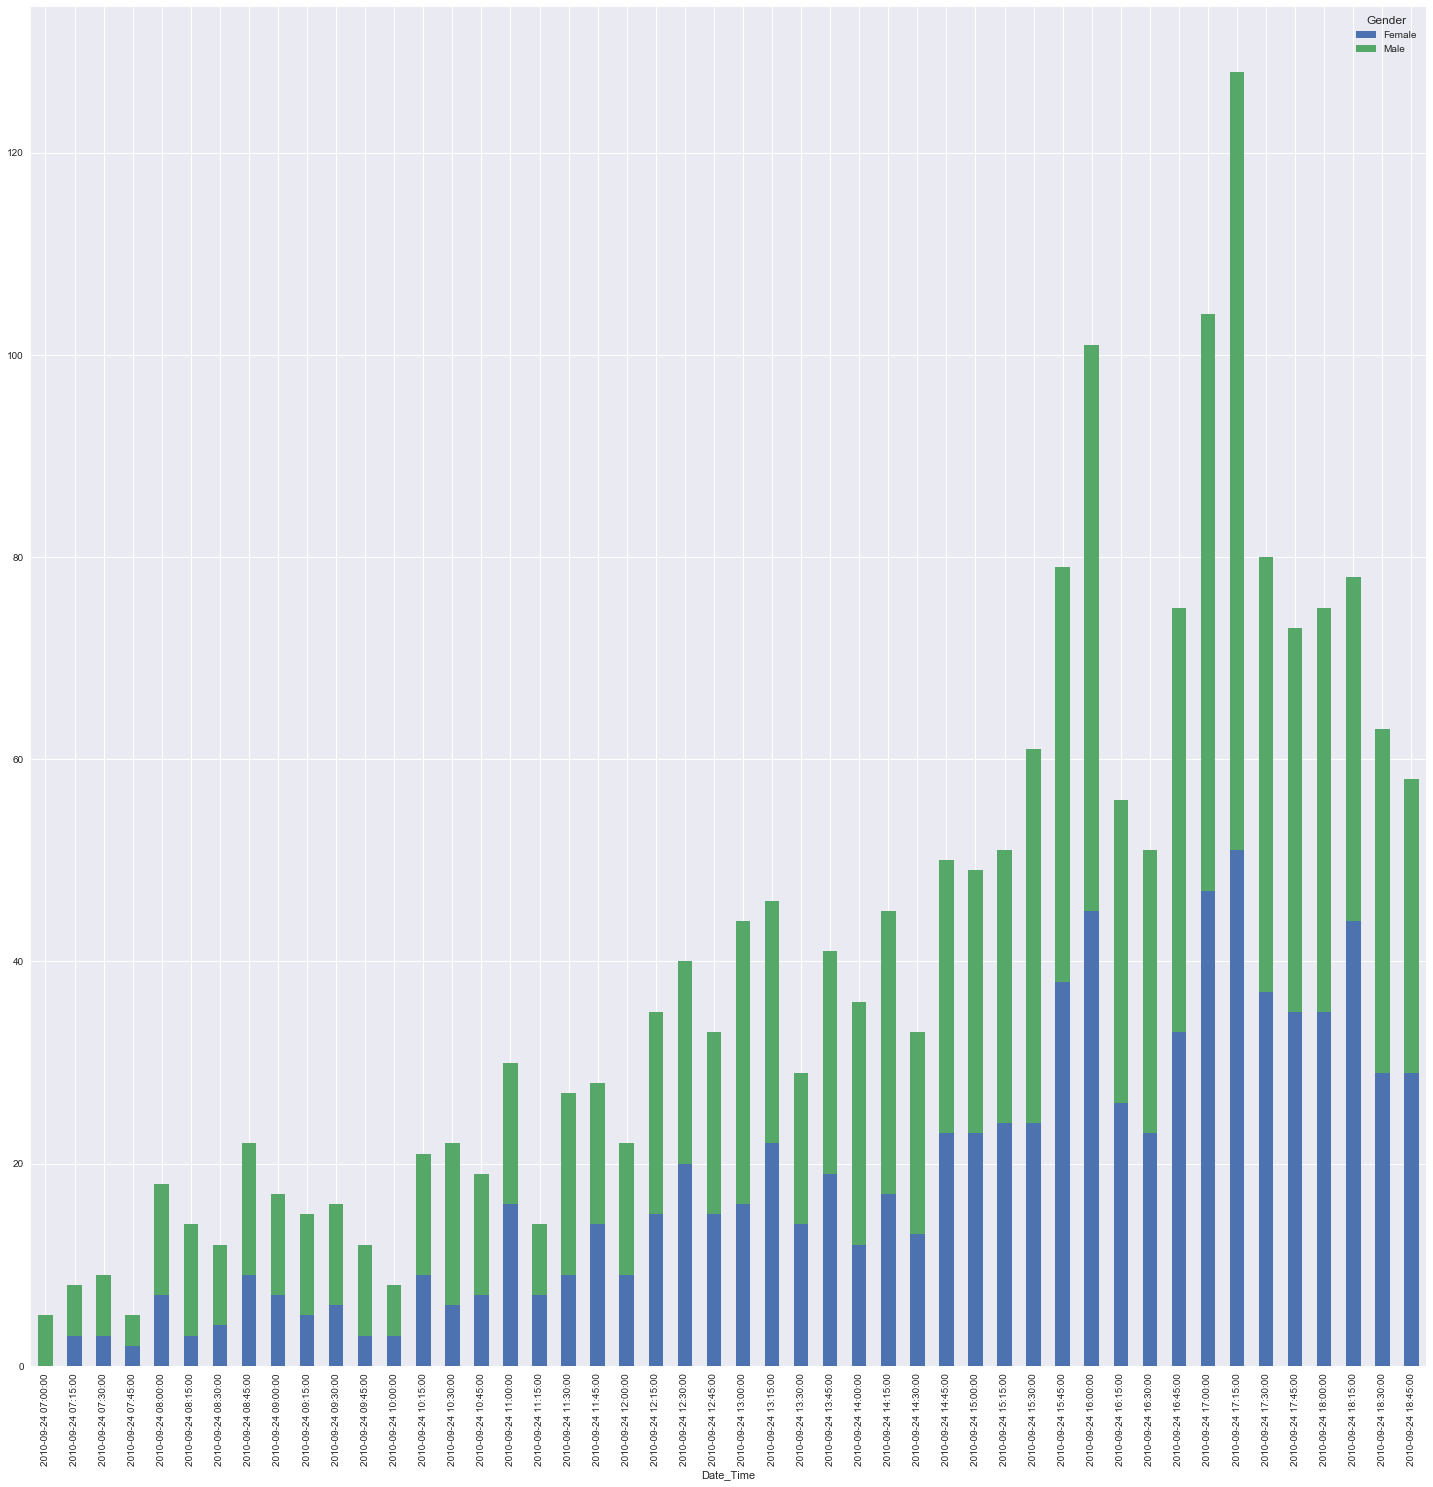

In [86]:
df2 = df.groupby(['Date_Time', 'Gender'])['Date_Time'].count().unstack('Gender').fillna(0)

df2.plot(kind='bar', stacked=True, figsize=(25,25))

In [87]:
df2['Female']

Date_Time
2010-09-24 07:00:00     0.0
2010-09-24 07:15:00     3.0
2010-09-24 07:30:00     3.0
2010-09-24 07:45:00     2.0
2010-09-24 08:00:00     7.0
2010-09-24 08:15:00     3.0
2010-09-24 08:30:00     4.0
2010-09-24 08:45:00     9.0
2010-09-24 09:00:00     7.0
2010-09-24 09:15:00     5.0
2010-09-24 09:30:00     6.0
2010-09-24 09:45:00     3.0
2010-09-24 10:00:00     3.0
2010-09-24 10:15:00     9.0
2010-09-24 10:30:00     6.0
2010-09-24 10:45:00     7.0
2010-09-24 11:00:00    16.0
2010-09-24 11:15:00     7.0
2010-09-24 11:30:00     9.0
2010-09-24 11:45:00    14.0
2010-09-24 12:00:00     9.0
2010-09-24 12:15:00    15.0
2010-09-24 12:30:00    20.0
2010-09-24 12:45:00    15.0
2010-09-24 13:00:00    16.0
2010-09-24 13:15:00    22.0
2010-09-24 13:30:00    14.0
2010-09-24 13:45:00    19.0
2010-09-24 14:00:00    12.0
2010-09-24 14:15:00    17.0
2010-09-24 14:30:00    13.0
2010-09-24 14:45:00    23.0
2010-09-24 15:00:00    23.0
2010-09-24 15:15:00    24.0
2010-09-24 15:30:00    24.0
2010-09-24

# DISTRIBUTION FITTING

### 1
A) Distribution of Females is obviously discrete.


B) It is an unbounded, non negetive function.

### 2
Histogram

In [127]:
avg = df2['Female'].mean()
var = df2['Female'].var()
pdf_x = np.linspace(df2['Female'].min(),df2['Female'].max(),100)
pdf_y = 1.0/np.sqrt(2*np.pi*var)*np.exp(-0.5*(pdf_x-avg)**2/var)

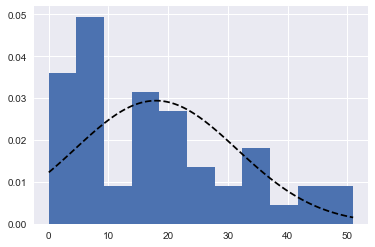

In [126]:
plt.figure()
plt.hist(df2['Female'],11,density=True)
plt.plot(pdf_x,pdf_y,'k--')
plt.show()

### Maximum Liklihood Estimator

In [139]:
df3 = norm.pdf(df2['Female'])
df2['Female PDF likelihood'] = df3
del df2['PDF likelihood']
df2.head()

Gender,Female,Male,Female PDF likelihood
Date_Time,,,
2010-09-24 07:00:00,0.0,5.0,3.989423e-01
2010-09-24 07:15:00,3.0,5.0,4.431848e-03
2010-09-24 07:30:00,3.0,6.0,4.431848e-03
2010-09-24 07:45:00,2.0,3.0,5.399097e-02
2010-09-24 08:00:00,7.0,11.0,9.134720e-12


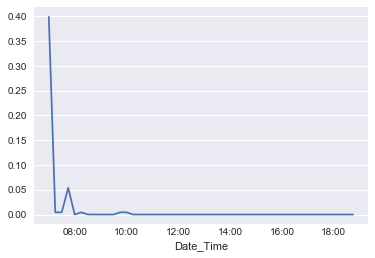

In [140]:
df2['Female PDF likelihood'].plot()

### Summary Statistics

### Median 

In [93]:
df2['Female'].median()

15.0

### Descriptive Statistics

In [95]:
df2['Female'].describe()

count    48.000000
mean     17.937500
std      13.573137
min       0.000000
25%       7.000000
50%      15.000000
75%      24.500000
max      51.000000
Name: Female, dtype: float64

### Variance

In [102]:
v = df2['Female'].var()

### Coefficient of Variation

In [101]:
variation(df2['Female'])

0.7487668952102748

### Lexis Ratio(Variance/Mean)

In [104]:
v/17.937500

10.270664986285121

### Skewness

In [105]:
df2['Female'].skew()

0.7754800761935949

### Skewness < 1. 

Therefore, data is skewed to the left. 